In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import matplotlib.pyplot as plt

In [2]:
# 1번함수
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class-directory
    one_hot = parts[-2] == class_names
    # Integer encode the label
    return tf.argmax(one_hot)
def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=3)
    # resize the image to the desired size
    return tf.image.resize(img, [img_height, img_width])
def process_path(file_path):
    label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label
# 2번 함수
def configure_for_performance(ds):
    ds = ds.cache()
    ds = ds.shuffle(buffer_size=1000)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

In [3]:
# data_dir = pathlib.Path('C:/Users/jaehee/.keras/datasets/voice')
#data_dir = pathlib.Path('C:/Users/jaehee/.keras/datasets/raw_data')
data_dir = pathlib.Path('D:/#2021_CAPSTONE/_DataSet/rm_temp_spec')

In [4]:
data_dir
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

750


In [ ]:
batch_size = 32
img_height = 288
img_width = 432
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="training",
    #color_mode="grayscale",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 750 files belonging to 3 classes.
Using 525 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="validation",
    seed=123,
    #color_mode="grayscale",
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1500 files belonging to 3 classes.
Using 450 files for validation.


In [48]:
# from keras import models, layers
# from keras import Input
# from keras.models import Model, load_model
# from keras.preprocessing.image import ImageDataGenerator
# from keras import optimizers, initializers, regularizers, metrics
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# from keras.layers import BatchNormalization, Conv2D, Activation, Dense, GlobalAveragePooling2D, MaxPooling2D, ZeroPadding2D, Add
 
# import os
# import matplotlib.pyplot as plt
# import numpy as np
# import math

# #data_dir = pathlib.Path('C:/Users/jaehee/.keras/datasets/final_log_mel_spec_data')

# train_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)
 
# train_dir = os.path.join('C:/Users/jaehee/.keras/datasets/final_log_mel_spec_data_resnet/train')
# val_dir = os.path.join('C:/Users/jaehee/.keras/datasets/final_log_mel_spec_data_resnet/test')
 
 
 
# train_generator = train_datagen.flow_from_directory(train_dir, batch_size=16, target_size=(224, 224), color_mode='rgb')
# val_generator = val_datagen.flow_from_directory(val_dir, batch_size=16, target_size=(224, 224), color_mode='rgb')


Found 1050 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


In [49]:
# print(type(train_generator))
# print(type(train_ds))

# print(type(train_dir))


<class 'tensorflow.python.keras.preprocessing.image.DirectoryIterator'>
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<class 'str'>


In [7]:
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)
print(num_classes)

['morning', 'traffic', 'weather']
3


In [8]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 128, 256, 3)
(32,)


In [9]:
for image, label in train_ds.take(2):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (32, 128, 256, 3)
Label:  [2 2 0 0 1 2 1 2 0 2 1 1 2 2 0 1 0 1 2 0 0 0 1 2 2 1 1 2 1 0 2 1]
Image shape:  (32, 128, 256, 3)
Label:  [0 1 2 0 0 2 2 0 0 0 0 2 0 2 0 0 0 1 2 1 0 1 2 1 1 2 1 2 0 1 0 1]


In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
print(train_ds)

<PrefetchDataset shapes: ((None, 128, 256, 3), (None,)), types: (tf.float32, tf.int32)>


In [91]:
#위랑 성능 비교해 봐야 함

# 1번 함수 사용 
# train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
# val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

# 2번 함수 사용
# train_ds = configure_for_performance(train_ds)
# val_ds = configure_for_performance(val_ds)

In [92]:
# 앞의 몇 개 데이터 이미지 시각화 시켜서 확인

# image_batch, label_batch = next(iter(train_ds))

# plt.figure(figsize=(10, 10))
# for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(image_batch[i].numpy().astype("uint8"))
#     label = label_batch[i]
#     plt.title(class_names[label])
#     plt.axis("off")

In [11]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [12]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
#print(image_batch, labels_batch)

0.003921569 0.95598966


In [95]:
# model = Sequential([
#     layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#     layers.Conv2D(16, (3,3), padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(32, (3,3), padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(64, (3,3), padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Dropout(0.2),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(num_classes)
# ])

In [96]:
# ########## 여서부터 CNN 시작 ############
# model = Sequential() # Sequential 모델은 각 레이어에 정확히 하나의 입력 텐서와 하나의 출력 텐서가 있는 일반 레이어 스택에 적합합니다

# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256,128,1))) # Conv2D: 필터 수, kernal_size: 필터 크기, input_shape= 입력층 (가로: 50, 세로: 50, 채널: 3) 모델에 적용
#                                                                                       # zero paddding의 값은? (Filter Size - 1) / 2
#                                                                                     # 굳이 알필요는 없지만 출력층의 weight의 개수는? ( Input Size + 2 * Padding - Filter Size ) / Stride + 1 ( 4 + 2 * 0 - 2 ) / 1 + 1 = 3 * 3

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2))) # 사이즈 줄이고-> 여기서 padding을 설정하면 same으로 하면 같이 유지가 돼 가장 네모 정사각형 안겹치게 해서 가장 큰 값 뽑아내기
# model.add(Dropout(0.25)) # Dropout란? 과적합을 방지하기 위해서 학습 시에 지정된 비율만큼 임의의 입력 뉴런(1차원)을 제외시킵니다.
# model.add(Flatten())
# model.add(Dense(128, activation='relu')) # 첫번째 인자 : 출력 뉴런의 수를 설정합니다, input_dim : 입력 뉴런의 수를 설정합니다
#                                          # init : 가중치 초기화 방법 설정합니다.‘uniform’ : 균일 분포, ‘normal’ : 가우시안 분포
# # model.add(Dropout(0.5))
# model.add(Dense(3, activation='softmax')) # 소프트맥스 출력의 각 원소는 0.0 이상 1.0 이하의 실수입니다. 그리고 노드의 출력을 모두 합한 값이 항상 1이 됩니다.
#                                           # 소프트맥스 함수의 좋은 점은 예측이 잘 이루어지면 1에 가까운 출력은 하나만 있고 다른 출력은 0에 가까워진다는 점입니다.
#                                           # 하지만 예측이 잘 이루어지지 않으면 여러 레이블이 비슷한 확률을 가지게 될 수 있습니다.

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit_generator(train_generator, steps_per_epoch=200, epochs=50, validation_data=test_generator, validation_steps= 40)

In [97]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [98]:
# model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_9 (Rescaling)      (None, 128, 256, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 128, 256, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 128, 16)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 128, 32)       4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 32, 64)       

In [13]:
from keras import models, layers
from keras import Input
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import BatchNormalization, Conv2D, Activation, Dense, GlobalAveragePooling2D, MaxPooling2D, ZeroPadding2D, Add
 
import os
import matplotlib.pyplot as plt
import numpy as np
import math

#data_dir = pathlib.Path('C:/Users/jaehee/.keras/datasets/final_log_mel_spec_data')

#train_datagen = ImageDataGenerator(rescale=1./255)
#val_datagen = ImageDataGenerator(rescale=1./255)
 
#train_dir = os.path.join('C:/Users/jaehee/.keras/datasets/final_log_mel_spec_data/train')
#val_dir = os.path.join('C:/Users/jaehee/.keras/datasets/final_log_mel_spec_data/test')
 
 
 
#train_generator = train_datagen.flow_from_directory(train_dir, batch_size=16, target_size=(224, 224), color_mode='rgb')
#val_generator = val_datagen.flow_from_directory(val_dir, batch_size=16, target_size=(224, 224), color_mode='rgb')

# number of classes
#K = 4
K = 3
 
input_tensor = Input(shape=(128, 256, 3), dtype='float32', name='input') # shape=(224, 224, 3)

def conv1_layer(x):    
    x = ZeroPadding2D(padding=(3, 3))(x)
    x = Conv2D(64, (7, 7), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1,1))(x)
 
    return x   
 
    
def conv2_layer(x):         
    x = MaxPooling2D((3, 3), 2)(x)     
 
    shortcut = x
 
    for i in range(3):
        if (i == 0):
            x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(shortcut)            
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)
 
            x = Add()([x, shortcut])
            x = Activation('relu')(x)
            
            shortcut = x
 
        else:
            x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)            
 
            x = Add()([x, shortcut])   
            x = Activation('relu')(x)  
 
            shortcut = x        
    
    return x
 
 
 
def conv3_layer(x):        
    shortcut = x    
    
    for i in range(4):     
        if(i == 0):            
            x = Conv2D(128, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)        
            
            x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)  
 
            x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(512, (1, 1), strides=(2, 2), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)            
 
            x = Add()([x, shortcut])    
            x = Activation('relu')(x)    
 
            shortcut = x              
        
        else:
            x = Conv2D(128, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)            
 
            x = Add()([x, shortcut])     
            x = Activation('relu')(x)
 
            shortcut = x      
            
    return x
 
 
 
def conv4_layer(x):
    shortcut = x        
  
    for i in range(6):     
        if(i == 0):            
            x = Conv2D(256, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)        
            
            x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)  
 
            x = Conv2D(1024, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(1024, (1, 1), strides=(2, 2), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)
 
            x = Add()([x, shortcut]) 
            x = Activation('relu')(x)
 
            shortcut = x               
        
        else:
            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(1024, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)            
 
            x = Add()([x, shortcut])    
            x = Activation('relu')(x)
 
            shortcut = x      
 
    return x
 
 
 
def conv5_layer(x):
    shortcut = x    
  
    for i in range(3):     
        if(i == 0):            
            x = Conv2D(512, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)        
            
            x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)  
 
            x = Conv2D(2048, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(2048, (1, 1), strides=(2, 2), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)            
 
            x = Add()([x, shortcut])  
            x = Activation('relu')(x)      
 
            shortcut = x               
        
        else:
            x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(2048, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)           
            
            x = Add()([x, shortcut]) 
            x = Activation('relu')(x)       
 
            shortcut = x                  
 
    return x
 
 
 
x = conv1_layer(input_tensor)
x = conv2_layer(x)
x = conv3_layer(x)
x = conv4_layer(x)
x = conv5_layer(x)
 
x = GlobalAveragePooling2D()(x)
output_tensor = Dense(K, activation='softmax')(x)
 
resnet50 = Model(input_tensor, output_tensor)
resnet50.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 128, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 262, 3)  0           input[0][0]                      
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 128, 64)  9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 64, 128, 64)  256         conv2d[0][0]                     
______________________________________________________________________________________________

In [14]:
resnet50.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# gpu

In [15]:
tf.debugging.set_log_device_placement(True)

In [16]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

## 오래걸리는 부분

In [17]:
with tf.device('/GPU:0'):
    EPOCHS=300
    history = resnet50.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        #callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2)
    )

Epoch 1/300
33/33 [==============================] - 43s 736ms/step - loss: 1.3849 - accuracy: 0.6796 - val_loss: 3907.3486 - val_accuracy: 0.3422
Epoch 2/300
33/33 [==============================] - 12s 363ms/step - loss: 0.1906 - accuracy: 0.9416 - val_loss: 118.5562 - val_accuracy: 0.3422
Epoch 3/300
33/33 [==============================] - 12s 364ms/step - loss: 0.0812 - accuracy: 0.9649 - val_loss: 24.7442 - val_accuracy: 0.3467
Epoch 4/300
33/33 [==============================] - 12s 363ms/step - loss: 0.0666 - accuracy: 0.9729 - val_loss: 15.7507 - val_accuracy: 0.3511
Epoch 5/300
33/33 [==============================] - 12s 364ms/step - loss: 0.0468 - accuracy: 0.9851 - val_loss: 0.2312 - val_accuracy: 0.9311
Epoch 6/300
33/33 [==============================] - 12s 364ms/step - loss: 0.0420 - accuracy: 0.9839 - val_loss: 1.3112 - val_accuracy: 0.6644
Epoch 7/300
33/33 [==============================] - 12s 367ms/step - loss: 0.0358 - accuracy: 0.9868 - val_loss: 0.3107 - val_ac

Epoch 111/300
33/33 [==============================] - 12s 362ms/step - loss: 2.1200e-06 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 0.9956
Epoch 112/300
33/33 [==============================] - 12s 361ms/step - loss: 2.1199e-06 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 0.9956
Epoch 113/300
33/33 [==============================] - 12s 362ms/step - loss: 1.5189e-06 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 0.9956
Epoch 114/300
33/33 [==============================] - 12s 362ms/step - loss: 2.3495e-06 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 0.9956
Epoch 115/300
33/33 [==============================] - 12s 362ms/step - loss: 2.0636e-06 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 0.9956
Epoch 116/300
33/33 [==============================] - 12s 362ms/step - loss: 2.1617e-06 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 0.9956
Epoch 117/300
33/33 [==============================] - 12s 362ms/step - loss: 1.8694e-06 - accuracy:

Epoch 220/300
33/33 [==============================] - 12s 364ms/step - loss: 2.1059e-07 - accuracy: 1.0000 - val_loss: 0.0222 - val_accuracy: 0.9956
Epoch 221/300
33/33 [==============================] - 12s 366ms/step - loss: 1.9943e-07 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 0.9956
Epoch 222/300
33/33 [==============================] - 12s 363ms/step - loss: 2.3074e-07 - accuracy: 1.0000 - val_loss: 0.0222 - val_accuracy: 0.9956
Epoch 223/300
33/33 [==============================] - 12s 360ms/step - loss: 1.8379e-07 - accuracy: 1.0000 - val_loss: 0.0222 - val_accuracy: 0.9956
Epoch 224/300
33/33 [==============================] - 12s 363ms/step - loss: 2.1923e-07 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 0.9956
Epoch 225/300
33/33 [==============================] - 12s 365ms/step - loss: 2.0979e-07 - accuracy: 1.0000 - val_loss: 0.0222 - val_accuracy: 0.9956
Epoch 226/300
33/33 [==============================] - 12s 369ms/step - loss: 2.3201e-07 - accuracy:

In [23]:
from keras.models import load_model
resnet50.save('resnet50_model.h5')

In [26]:
model_json = resnet50.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

In [24]:
train_avg = np.mean(history.history['accuracy'])
test_avg = np.mean(history.history['val_accuracy'])
print('train_avg = {0:.4f}'.format(train_avg))
print('test_avg = {0:.4f}'.format(test_avg))

train_avg = 0.9983
test_avg = 0.9734


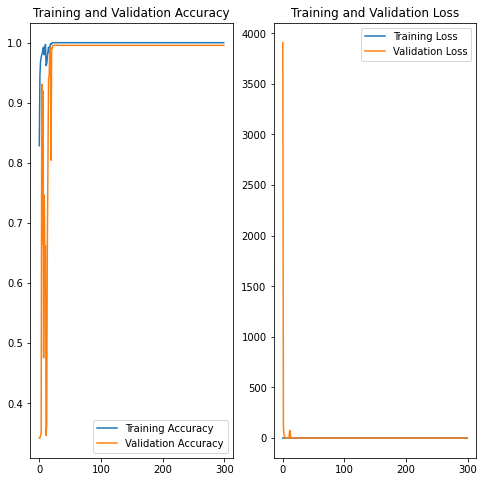

<Figure size 432x288 with 0 Axes>

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig('Epoch  300')

In [22]:
from keras.models import load_model
model.save('voice_predict_model.h5')

NameError: name 'model' is not defined

In [20]:
import cv2
import numpy as np

# image = cv2.imread('C:\\Users\\jaehee\\Desktop\\jupyter_proj\\test_voice\\tvon.png')
# gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# plt.imshow(gray, cmap='gray')
# plt.show()
img = Image.open('C:\\Users\\jaehee\\Desktop\\jupyter_proj\\test_voice\\tvon.png')
imgGray = img.convert('L')
imgGray.save('test_gray.png')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jaehee\\Desktop\\jupyter_proj\\test_voice\\tvon.png'

In [35]:
from keras.preprocessing import image

image_path = 'C:\\Users\\jaehee\\Desktop\\jupyter_proj\\test_voice\\tvon.png'
img = image.load_img(image_path, target_size=(img_height, img_width))

In [153]:
from keras.preprocessing import image

image_path = 'C:/Users/jaehee/.keras/datasets/new_gray_data/all/living_room5.png'
img = image.load_img(image_path, target_size=(img_height, img_width))

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 1) # Create a batch

predictions = model.predict(img_array)
print(predictions)
score = tf.nn.softmax(predictions[0])
print(score)
print(
    "새로운 데이터는 {} 클래스일 확률이 {:.2f}%입니다..".format(class_names[np.argmax(score)], 100 * np.max(score))
)

ValueError: in user code:

    C:\Users\jaehee\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\jaehee\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\jaehee\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\jaehee\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\jaehee\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\jaehee\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\jaehee\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\jaehee\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\jaehee\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\jaehee\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\jaehee\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\jaehee\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\jaehee\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer conv2d_21 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape [32, 1, 256, 3]


In [51]:
tf.__version__

'2.3.0'

In [71]:
from keras.models import load_model
model = load_model('voice_predict_model.h5')

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 128, 256, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 256, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 128, 16)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 128, 32)       4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 32, 64)       